In [19]:
import sys
sys.path.append('../../')
import torch
import torchvision.transforms as transforms
import torchvision
from models.clip_image_pretrained import CLIP_image
from torchvision.datasets.folder import default_loader

args = {
                 'root': '../../data/',
                 'attribute_idx_amount': 1,
                 'crop_size': 224,
                 'brightness': 0.4, 
                 'contrast': 0.4, 
                 'saturation': .2, 
                 'hue': .1, 
                 'color_jitter_prob': 0, 
                 'gray_scale_prob': 0, 
                 'horizontal_flip_prob': 0.5, 
                 'gaussian_prob': 0, 
                 'min_scale': 0.9, 
                 'max_scale': 1}

transform = torchvision.transforms.Compose([
                                transforms.RandomApply(
                                    [transforms.ColorJitter(args['brightness'], args['contrast'], args['saturation'], args['hue'])],
                                    p=args['color_jitter_prob'],
                                ),
                            #torchvision.transforms.Resize((224, 224)),
                            transforms.RandomResizedCrop((args['crop_size'], args['crop_size']), scale=(args['min_scale'], args['max_scale']),
                                    interpolation=transforms.InterpolationMode.BICUBIC),
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.RandomHorizontalFlip(p=args['horizontal_flip_prob']),
                            torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                std=[0.229, 0.224, 0.225])
                            ])  

model = CLIP_image(args=None)
    
checkpoint = torch.load('{name}'.format(name = '../CLIP_image/checkpoints/CUB_CLIP_image_linear/CUB_CLIP_image_linear_Final.pt'))
new_dict = {}
for i in checkpoint['model_state_dict']:
    new_dict[i[7:]] = checkpoint['model_state_dict'][i]
model.load_state_dict(new_dict)
model = model.cuda()







torch.return_types.topk(
values=tensor([[ 0.2546, -1.0039, -1.5534, -1.8484, -2.2695],
        [ 0.3224, -0.8834, -1.6197, -1.7684, -2.3259],
        [ 0.4292, -1.1322, -1.5547, -2.0377, -2.1144],
        [ 0.7478, -0.6434, -1.7670, -2.0153, -2.0327]], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([[11, 12,  5,  6,  1],
        [11, 12,  6,  5, 13],
        [11, 12,  1,  5, 14],
        [11, 12,  1, 14,  5]], device='cuda:0'))

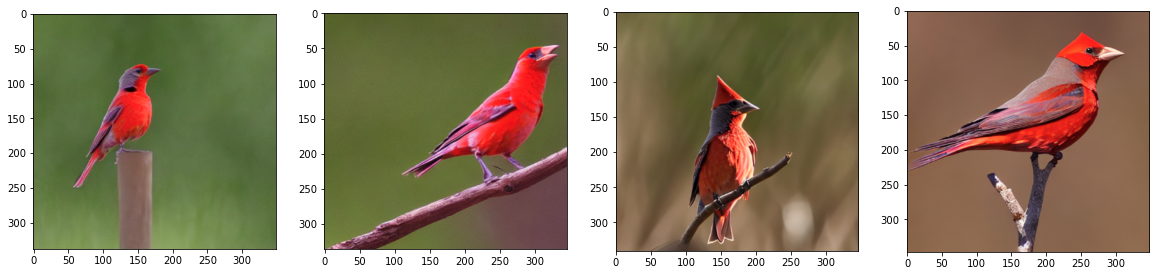

In [25]:
im1 = default_loader('generated-red-wings/red1.png')
im2 = default_loader('generated-red-wings/red2.png')
im3 = default_loader('generated-red-wings/red3.png')
im4 = default_loader('generated-red-wings/red4.png')
import matplotlib.pyplot as plt
# show 4 photos side by side by ax.subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
ax[0].imshow(im1)
ax[1].imshow(im2)
ax[2].imshow(im3)
ax[3].imshow(im4)

im1 = transform(im1)
im2 = transform(im2)
im3 = transform(im3)
im4 = transform(im4)

#stack the images into a batch
ims = torch.stack([im1, im2, im3, im4])
out = model(ims.cuda())

torch.topk(out[0][0][:, 9:24], 5)

torch.return_types.topk(
values=tensor([[ 0.7770, -0.8317, -1.7467, -1.9149, -2.0767],
        [ 0.5648, -0.6389, -0.6822, -0.7821, -1.3714],
        [-0.9705, -1.0337, -1.1924, -1.7069, -1.8651],
        [-0.6467, -1.1556, -1.4042, -1.6899, -2.1274]], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([[11, 12,  6,  5, 13],
        [11,  1, 14, 12,  5],
        [11,  5,  1, 12,  6],
        [11,  6,  5, 12,  0]], device='cuda:0'))

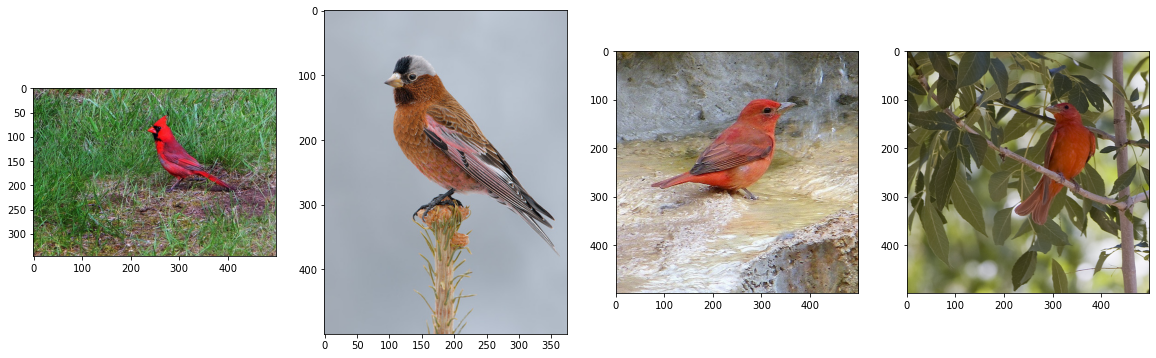

In [32]:
im1 = default_loader('../inversion/red_wings_random_class/red1.jpg')
im2 = default_loader('../inversion/red_wings_random_class/red2.jpg')
im3 = default_loader('../inversion/red_wings_random_class/red3.jpg')
im4 = default_loader('../inversion/red_wings_random_class/red4.jpg')
import matplotlib.pyplot as plt
# show 4 photos side by side by ax.subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
ax[0].imshow(im1)
ax[1].imshow(im2)
ax[2].imshow(im3)
ax[3].imshow(im4)

im1 = transform(im1)
im2 = transform(im2)
im3 = transform(im3)
im4 = transform(im4)

#stack the images into a batch
ims = torch.stack([im1, im2, im3, im4])
out = model(ims.cuda())

torch.topk(out[0][0][:, 9:24], 5)

torch.return_types.topk(
values=tensor([[ 0.1078, -1.3143, -1.3201, -1.6120, -2.5341],
        [ 0.2410, -0.4644, -1.5640, -1.9041, -2.8246],
        [ 0.9928, -1.2125, -1.3791, -1.6572, -2.0767],
        [ 0.0587, -1.2696, -1.3463, -1.8259, -1.9910]], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([[11,  0,  5, 12,  1],
        [11,  0,  5, 12,  1],
        [11, 12,  5,  0,  1],
        [11,  0, 12,  1,  5]], device='cuda:0'))

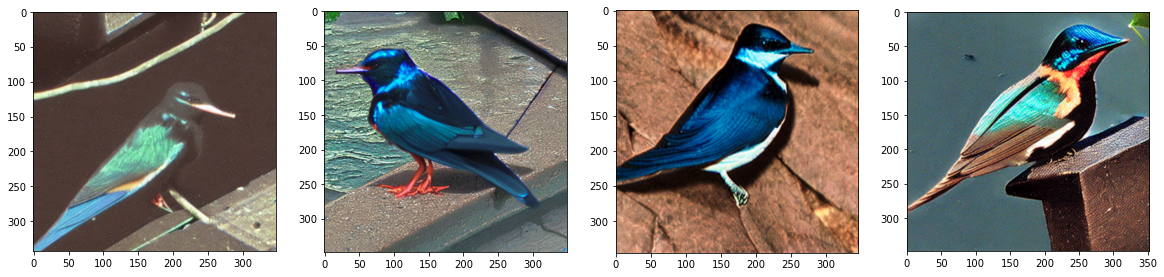

In [34]:
im1 = default_loader('generated-blue-wings/blue1.png')
im2 = default_loader('generated-blue-wings/blue2.png')
im3 = default_loader('generated-blue-wings/blue3.png')
im4 = default_loader('generated-blue-wings/blue4.png')
import matplotlib.pyplot as plt
# show 4 photos side by side by ax.subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
ax[0].imshow(im1)
ax[1].imshow(im2)
ax[2].imshow(im3)
ax[3].imshow(im4)

im1 = transform(im1)
im2 = transform(im2)
im3 = transform(im3)
im4 = transform(im4)

#stack the images into a batch
ims = torch.stack([im1, im2, im3, im4])
out = model(ims.cuda())

torch.topk(out[0][0][:, 9:24], 5)

torch.return_types.topk(
values=tensor([[-0.3586, -0.4159, -1.0653, -2.2538, -2.2813],
        [ 0.0533, -0.8073, -1.7562, -1.9339, -2.1138],
        [ 0.4885, -0.9654, -1.0007, -1.1350, -2.4089],
        [-0.4522, -0.8071, -1.0790, -1.7948, -2.1092]], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([[11,  5,  0, 12,  1],
        [11,  0,  5, 12,  6],
        [11, 12,  0,  5,  1],
        [11,  1, 12,  0, 14]], device='cuda:0'))

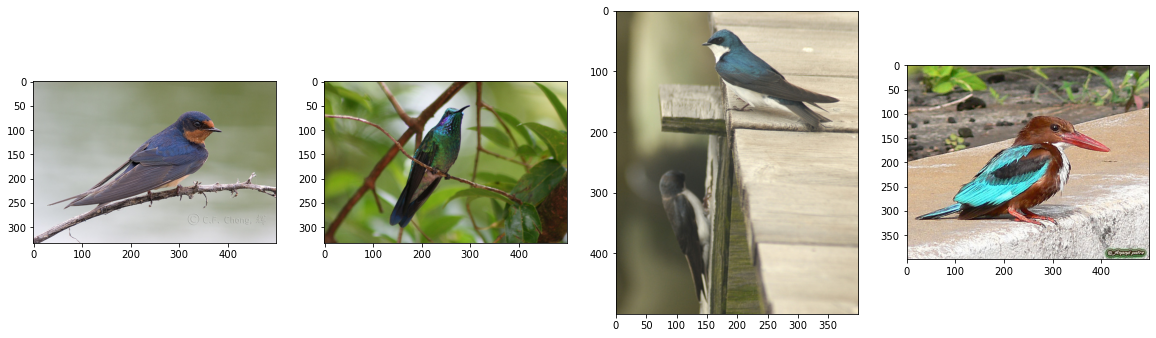

In [35]:
im1 = default_loader('../inversion/blue_wings_random_class/blue1.jpg')
im2 = default_loader('../inversion/blue_wings_random_class/blue2.jpg')
im3 = default_loader('../inversion/blue_wings_random_class/blue3.jpg')
im4 = default_loader('../inversion/blue_wings_random_class/blue4.jpg')
import matplotlib.pyplot as plt
# show 4 photos side by side by ax.subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
ax[0].imshow(im1)
ax[1].imshow(im2)
ax[2].imshow(im3)
ax[3].imshow(im4)

im1 = transform(im1)
im2 = transform(im2)
im3 = transform(im3)
im4 = transform(im4)

#stack the images into a batch
ims = torch.stack([im1, im2, im3, im4])
out = model(ims.cuda())

torch.topk(out[0][0][:, 9:24], 5)